# BikeShare Insights: Analyzing Factors Influencing Bike Sharing Activity
### Prepared by Faizan Bokhari

## Project Overview:

Bike share programs have emerged as a popular transportation option in urban areas, providing a convenient and environmentally friendly alternative to traditional modes of transportation. These programs allow individuals to rent bicycles for short periods, typically for a single trip or a few hours, before returning them to designated stations. The popularity of bike share programs has grown significantly in recent years, driven by factors such as increased urbanization, a focus on sustainable transportation options, and efforts to reduce traffic congestion and air pollution.

Understanding the factors that influence bike share usage is essential for optimizing the availability and promotion of these services. By analyzing data related to bike share counts and various external factors, such as weather conditions, day of the week, and time of day, we can uncover patterns and correlations that can inform strategies to enhance the effectiveness and efficiency of bike share programs.

This report presents an analysis of a dataset containing information on bike share counts and several key variables, including temperature, humidity, day of the week, hour of the day, and weather conditions. The goal of this analysis is to identify trends and relationships that can provide insights into the factors driving bike share usage. By gaining a deeper understanding of these factors, bike share operators can better tailor their services to meet the needs of users and promote sustainable urban transportation.

## Problem Framing & Big Picture :

***
### 1. Problem Framing:
Bike sharing has become a popular and convenient mode of transportation in urban areas. Understanding the factors that influence bike sharing activity can help optimize bike-sharing services, improve user experience, and guide infrastructure planning. This project aims to analyze bike-sharing data to identify key factors that impact the number of bike shares, providing insights for stakeholders to enhance bike-sharing systems.

***

### 2. Big Picture:
By analyzing bike-sharing data, we aim to uncover patterns and trends that influence bike-sharing activity. This analysis will help stakeholders, such as bike-sharing companies, city planners, and policymakers, make informed decisions to improve the efficiency and effectiveness of bike-sharing systems. Insights gained from this project can lead to better service availability, increased user satisfaction, and overall improvement in urban mobility.
***

### 3. Methodology:
The analysis is based on a comprehensive dataset that includes several key variables, such as temperature, humidity, weather conditions, day of the week, and hour of the day. These variables were chosen because they are likely to have a significant impact on bike share usage patterns.

To understand the relationships between these variables and bike share counts, correlation analysis was conducted. Correlation analysis helps to identify the strength and direction of the relationships between variables. For example, a positive correlation between temperature and bike share counts would indicate that as temperatures rise, more people tend to use bike share services.

In addition to correlation analysis, data visualization techniques were employed to present the findings effectively. Visual representations, such as charts and graphs, can help to illustrate trends and patterns in the data that may not be immediately apparent from the raw numbers. These visualizations can provide valuable insights into the factors that influence bike share usage and can help to inform decision-making and strategy development for bike share operators.

***

### Data Dictionary:

The data source for this project is the London Bikeshare dataset available on Kaggle. The dataset used for model building contained 17414 observations of 10 features. The data contains the following information:


| Features | Description | 
|:---------|:--------:|
|  timestamp   |  timestamp field for grouping the data. |  
|  cnt   |  the count of a new bike shares.  |  
|  t1   |  real temperature in C. |  
|  t2   | temperature in C "feels like".|  
|  hum	| humidity in percentage.   |  
|  windspeed	|  wind speed in km/h.  |  
|  weather_code   |  category of the weather. |  
|  is_holiday   |  1 holiday / 0 non holiday.  |  
|  is_weekend   |  1 if the day is weekend. |  
|  season   | category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.|  

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
bike = pd.read_csv('london_merged.csv')

In [3]:
# Columns and the first five rows
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# Number of rows and columns
bike.shape

(17414, 10)

In [5]:
#Checking columns 
bike.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [6]:
# Size and type of data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
# Value counts of the column weather_code
bike.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [8]:
# Value counts of the column season
bike.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [9]:
# Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

bike.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# Converting humididty into percentage 
bike.humidity_percent=bike.humidity_percent/100

In [11]:
# Renaming the seasons
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}
bike.season = bike.season.astype('str')
bike.season = bike.season.map(season_dict)

In [12]:
# Renaming the weather
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}
bike.weather = bike.weather.astype('str')
bike.weather = bike.weather.map(weather_dict)

In [13]:
# Converting 'season' and 'weather' to categorical
bike['season'] = bike['season'].astype('category')
bike['weather'] = bike['weather'].astype('category')

In [14]:
# Format 'time'
bike['time'] = pd.to_datetime(bike['time'])

In [15]:
# Extracting data from the column time 
bike['year'] = bike['time'].dt.year
bike['month'] = bike['time'].dt.month
bike['dayofweek'] = bike['time'].dt.dayofweek
bike['hour'] = bike['time'].dt.hour

In [16]:
bike.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015,1,6,4


In [17]:
# Statistics analysis of the data
bike.describe()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend,year,month,dayofweek,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,0.723250,15.913063,0.022051,0.285403,2015.507810,6.514643,2.99265,11.513265
std,1085.108068,5.571818,6.615145,0.143132,7.894570,0.146854,0.451619,0.508157,3.452509,2.00406,6.915893
min,0.000000,-1.500000,-6.000000,0.205000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,6.000000,0.630000,10.000000,0.000000,0.000000,2015.000000,4.000000,1.00000,6.000000
50%,844.000000,12.500000,12.500000,0.745000,15.000000,0.000000,0.000000,2016.000000,7.000000,3.00000,12.000000
75%,1671.750000,16.000000,16.000000,0.830000,20.500000,0.000000,1.000000,2016.000000,10.000000,5.00000,18.000000
max,7860.000000,34.000000,34.000000,1.000000,56.500000,1.000000,1.000000,2017.000000,12.000000,6.00000,23.000000


Here's an explanation of the summary statistics for each column:

count: This column represents the number of bike shares. The statistics show that the minimum number of bike shares is 0, the maximum is 7860, and the mean is 1143.1. The standard deviation is 1085.1, indicating a wide variation in the number of bike shares.

temp_real_C: This column represents the real temperature in Celsius. The minimum temperature is -1.5°C, the maximum is 34°C, and the mean is 12.47°C. The standard deviation is 5.57°C, indicating some variability in temperature.

temp_feels_like_C: This column represents the "feels like" temperature in Celsius. The statistics are similar to temp_real_C, with a minimum of -6°C, a maximum of 34°C, and a mean of 11.52°C. The standard deviation is 6.62°C.

humidity_percent: This column represents the humidity in percentage. The minimum humidity is 20.5%, the maximum is 100%, and the mean is 72.3%. The standard deviation is 14.3%, indicating some variability in humidity.

wind_speed_kph: This column represents the wind speed in kilometers per hour. The minimum wind speed is 0 km/h, the maximum is 56.5 km/h, and the mean is 15.91 km/h. The standard deviation is 7.89 km/h.

is_holiday: This column is a binary indicator for holiday (1 for holiday, 0 for non-holiday). The mean of 0.022 indicates that holidays are relatively rare in the dataset.

is_weekend: This column is a binary indicator for weekend (1 for weekend, 0 for non-weekend). The mean of 0.285 indicates that weekends are more common in the dataset.

year: This column represents the year. The dataset spans from 2015 to 2017, with the mean year being approximately 2015.51.

month: This column represents the month. The minimum month is 1 (January), the maximum is 12 (December), and the mean is approximately 6.51. The dataset covers all months of the year.

dayofweek: This column represents the day of the week, where 0 is Monday and 6 is Sunday. The mean of approximately 2.99 indicates that the dataset has a fairly even distribution of days of the week.

hour: This column represents the hour of the day. The minimum hour is 0 (midnight), the maximum is 23 (11 PM), and the mean is approximately 11.51. The dataset covers all hours of the day.

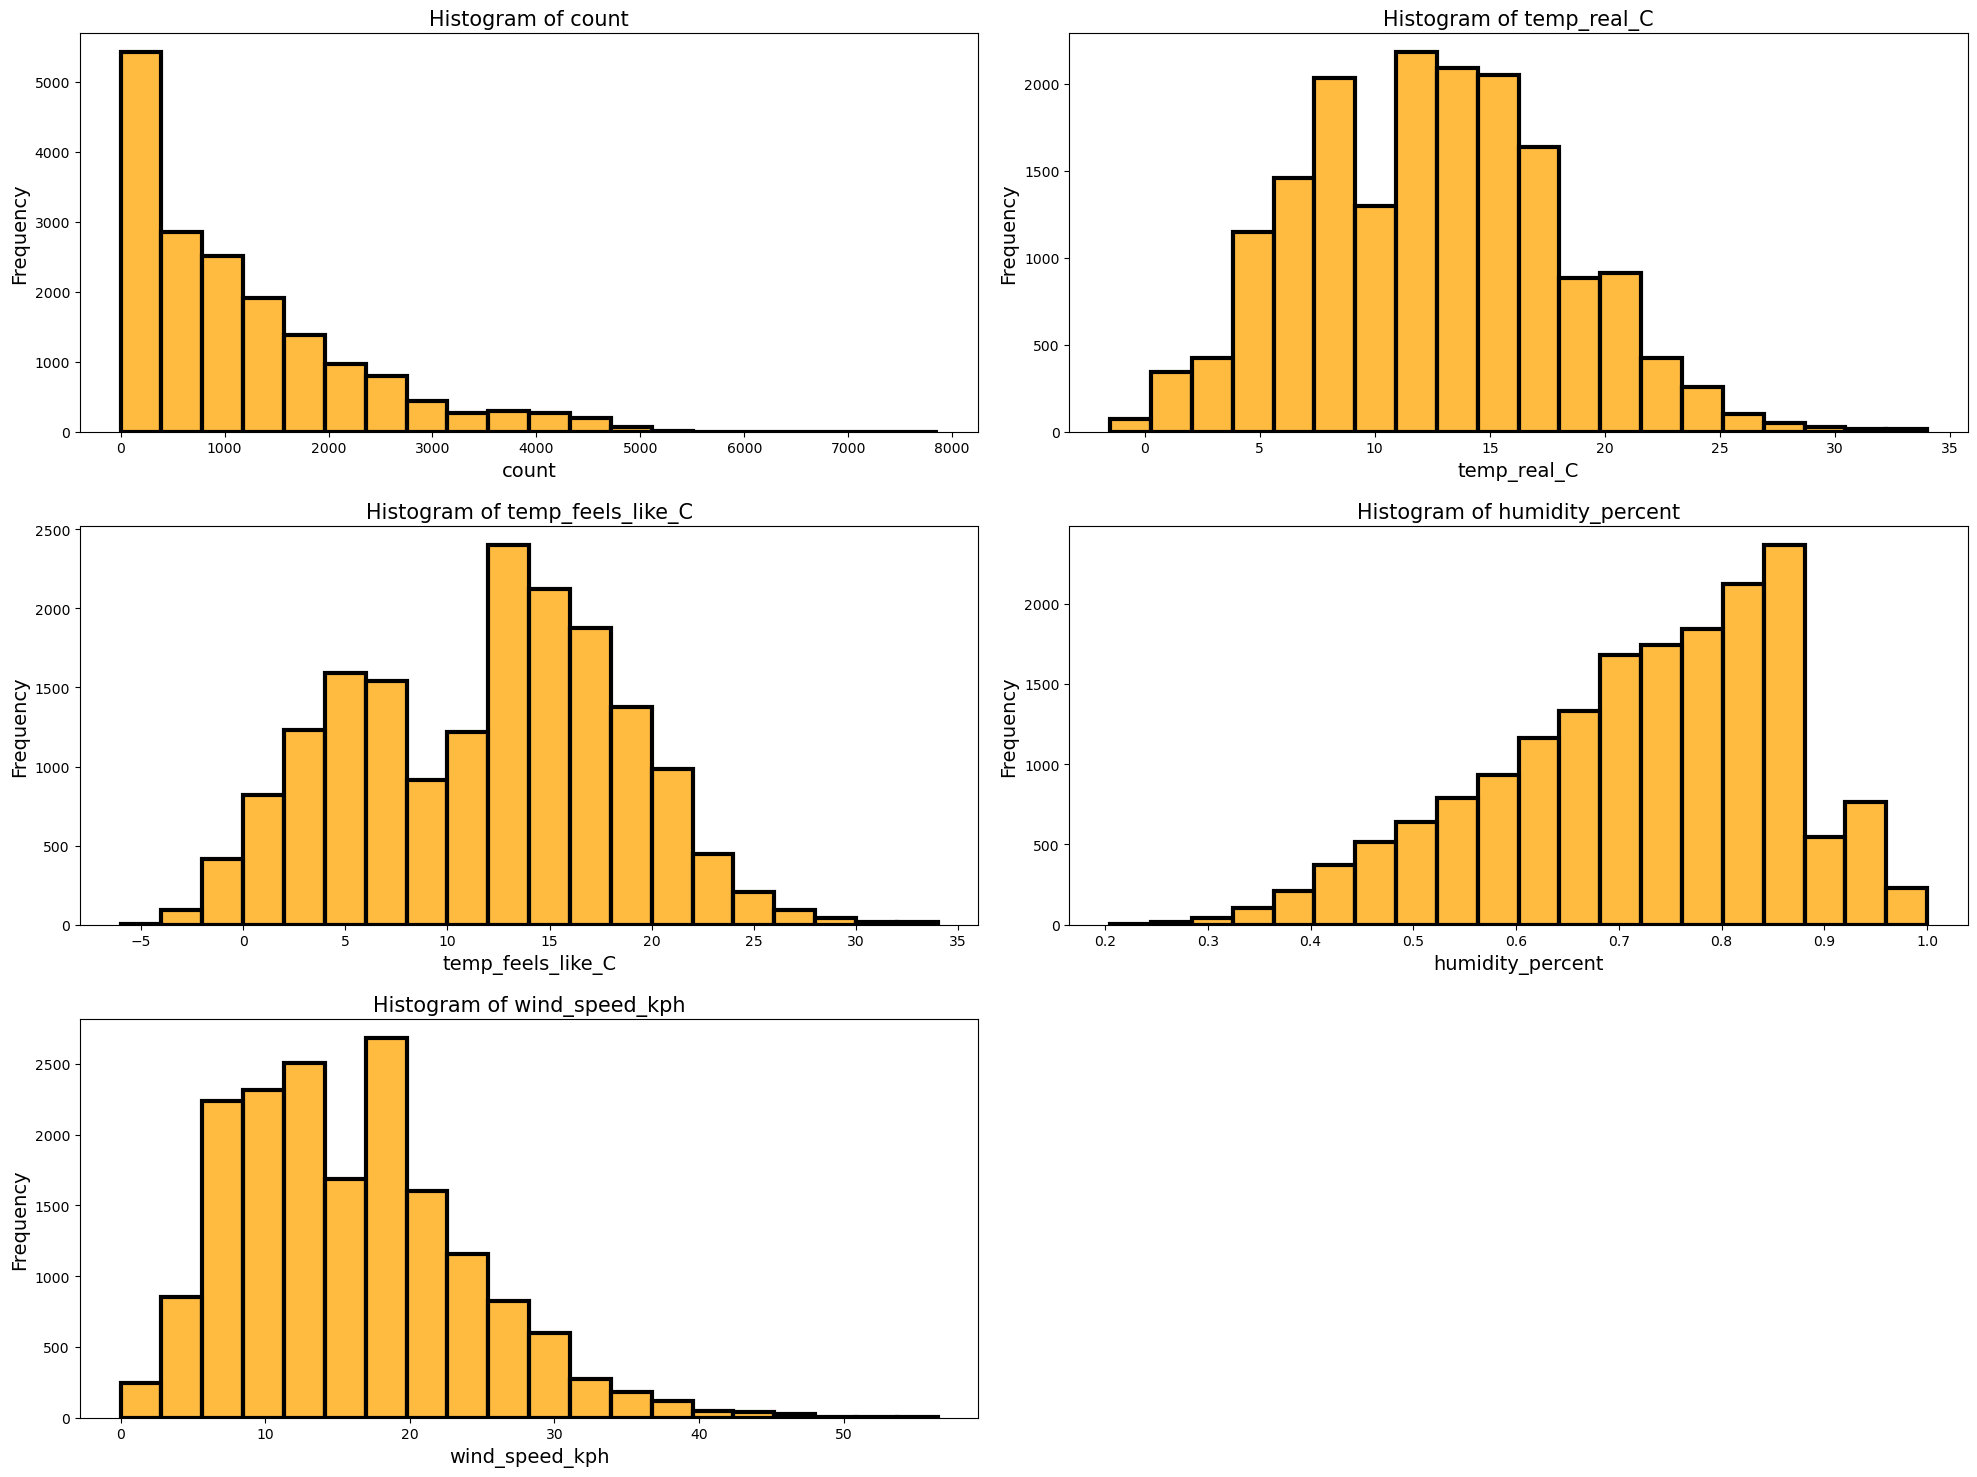

In [49]:
# Setting font size
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=15)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Numerical columns in the London bike share dataset
numerical_columns = ['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']

# Plotting histograms
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=bike, x=column, bins=20, color='orange', edgecolor='black', linewidth=3)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Here's a description of the summary statistics for each numerical column in the dataset:

count: This column indicates the number of non-null values for each variable. For all columns, there are 17,414 observations.

temp_real_C: The average real temperature is approximately 12.47°C, with a standard deviation of 5.57°C. 
Temperatures range from -1.5°C to 34°C. The distribution appears to be slightly right-skewed, as the mean is slightly higher than the median (12.5°C).

temp_feels_like_C: The average "feels like" temperature is around 11.52°C, with a standard deviation of 6.62°C. Temperatures range from -6°C to 34°C. Similar to the real temperature, the distribution seems slightly right-skewed.

humidity_percent: The average humidity is approximately 72.33%, with a standard deviation of 14.31%. Humidity ranges from 20.5% to 100%. The distribution appears to be slightly left-skewed.

wind_speed_kph: The average wind speed is about 15.91 km/h, with a standard deviation of 7.89 km/h. Wind speeds range from 0 km/h to 56.5 km/h. The distribution seems fairly symmetrical.

In [18]:
#Correlation 
bike.corr()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend,year,month,dayofweek,hour
count,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.051698,-0.096499,0.010046,0.063757,-0.068688,0.324423
temp_real_C,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.042233,-0.005342,-0.037959,0.332712,-0.002317,0.168708
temp_feels_like_C,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.040051,-0.008510,-0.044972,0.368366,-0.006824,0.153956
humidity_percent,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.032068,0.028098,0.072443,0.113149,0.011556,-0.295653
wind_speed_kph,0.116295,0.145471,0.088409,-0.287789,1.000000,-0.002606,0.011479,-0.094739,-0.086383,0.001708,0.141792
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,1.000000,-0.094898,0.034631,-0.011511,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,-0.094898,1.000000,0.003049,-0.005406,0.791975,0.001803
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,0.034631,0.003049,1.000000,-0.026547,-0.002876,0.000542
month,0.063757,0.332712,0.368366,0.113149,-0.086383,-0.011511,-0.005406,-0.026547,1.000000,-0.001080,-0.000312
dayofweek,-0.068688,-0.002317,-0.006824,0.011556,0.001708,-0.144628,0.791975,-0.002876,-0.001080,1.000000,0.001834


These are the correlation coefficients between different variables in your dataset. Correlation coefficients range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.

count:
Strong positive correlation with hour (0.324), indicating that bike shares tend to increase during certain hours of the day.
Moderate positive correlation with temp_real_C (0.389) and temp_feels_like_C (0.369), suggesting that higher temperatures are associated with more bike shares.
Moderate negative correlation with humidity_percent (-0.463), indicating that higher humidity is associated with fewer bike shares.

temp_real_C:
Moderate positive correlation with temp_feels_like_C (0.988), which is expected as the "feels like" temperature is often similar to the real temperature.
temp_feels_like_C:
Moderate positive correlation with temp_real_C (0.988), as mentioned above.

humidity_percent:
Weak negative correlation with wind_speed_kph (-0.288), indicating a slight decrease in humidity with higher wind speeds.

wind_speed_kph:
Weak positive correlation with count (0.116), suggesting a slight increase in bike shares with higher wind speeds.

is_holiday:
Weak negative correlation with count (-0.052), indicating that bike shares might be slightly lower on holidays.
is_weekend:
Weak negative correlation with count (-0.097), suggesting that bike shares might be slightly lower on weekends.
year, month, dayofweek:

These variables have weak correlations with count and other variables, indicating that they might not have a significant impact on bike shares.

These correlations provide valuable insights into the relationships between different variables in your dataset and can help guide further analysis and modeling efforts.


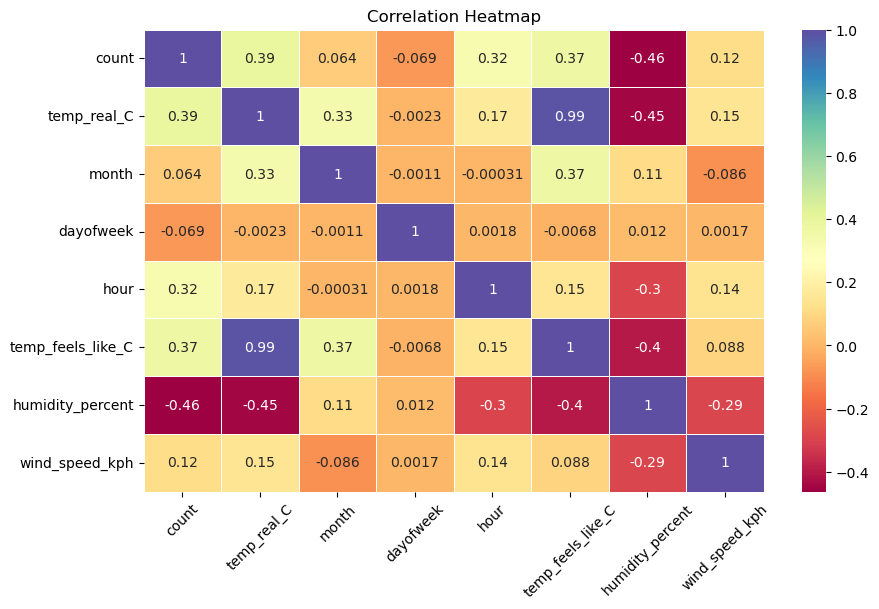

In [40]:
#Correlation Heatmap
corr_matrix = bike[['count', 'temp_real_C', 'month', 'dayofweek', 'hour', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Spectral', linewidths = .5)
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.show()

The strongest positive correlation appears to be between temp_real_C and temp_feels_like_C (0.99), indicating that these two variables are highly positively correlated, which is expected since they both relate to temperature.
There is a moderate positive correlation between temp_real_C and count (0.389), indicating that higher temperatures are associated with more bike shares.
There is a moderate negative correlation between humidity_percent and count (-0.463), indicating that higher humidity is associated with fewer bike shares.
There is a weak positive correlation between month and count(0.063757) suggests a slight tendency for bike shares to increase with higher month numbers.
There is a weak negative correlation between days of the week and count(-0.068688) indicates a slight tendency for bike shares to decrease on later days of the week. 
There is a weak positive correlation between hour and count (0.32), indicating that certain hours of the day are associated with higher bike shares counts.
There is a weak positive correlation between wind speed and count (0.116295), indicating that a slight tendency for bike shares to increase with higher wind speeds.

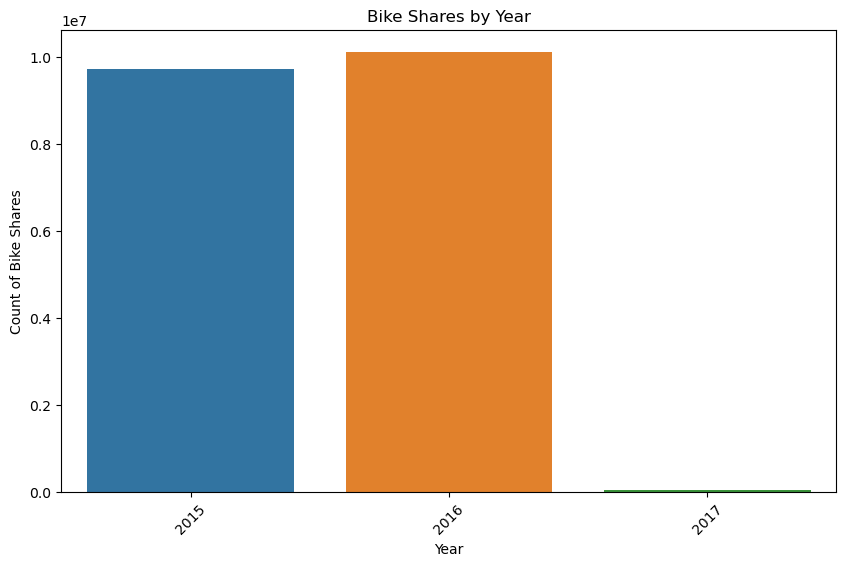

In [20]:
#Bike Shares by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', data=bike, estimator=sum, ci=None)
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation=45)
plt.show()

These numbers represent the total count of bike shares recorded for each year in the dataset. In 2015, there were approximately 9.74 million bike shares, which increased to about 10.13 million in 2016. However, in 2017, there was a significant drop in bike shares, with only 37,680 recorded for the entire year. This drop in 2017 is due to we dont have a complete data for 2017. 

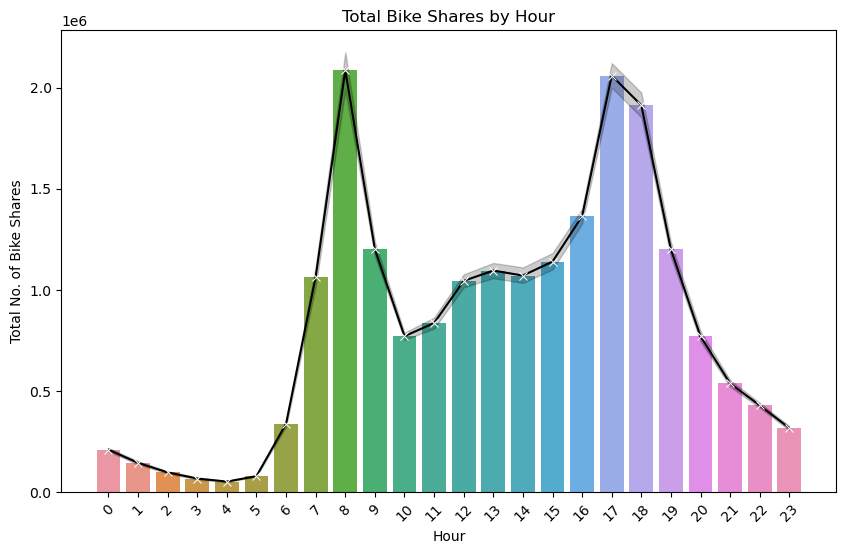

In [38]:
#Bike Shares by Hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=bike, estimator=sum, ci=None)
sns.lineplot(x='hour', y='count', data=bike, marker='x', linestyle='-', color='black', estimator=sum)
plt.title('Total Bike Shares by Hour')
plt.xlabel('Hour')
plt.ylabel('Total No. of Bike Shares')
plt.xticks(rotation=45)
plt.show()

This table provides a breakdown of the total number of bike shares recorded for each hour of the day. Here's a summary of the key points:

The dataset includes information on bike shares recorded hourly.

The total number of bike shares varies throughout the day, with peaks and troughs at different times.

The highest number of bike shares is recorded between 4 PM and 6 PM and between 7 AM to 9 AM, indicating peak usage hours are during rush hour.

The lowest number of bike shares is recorded in the early morning hours, between 2 AM and 5 AM.

Overall, the data suggests that bike share usage follows a distinct pattern throughout the day, with higher demand during rush hours and lower demand during others.

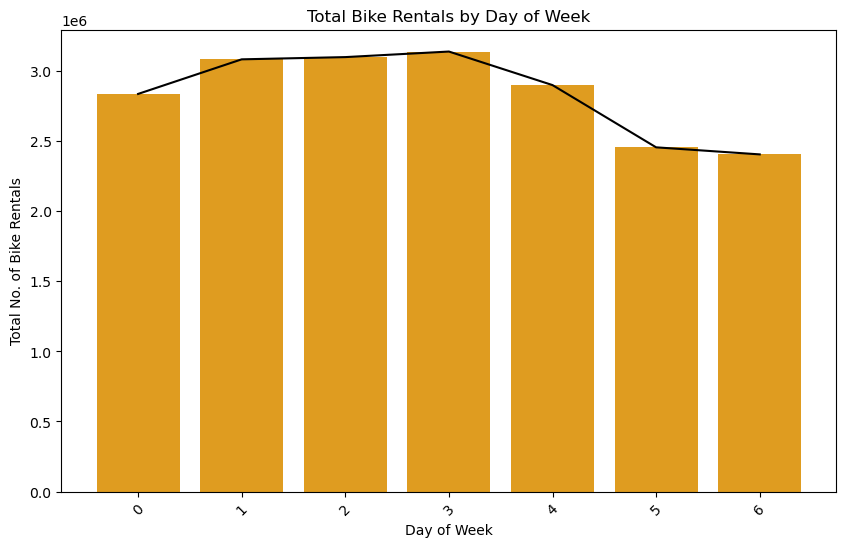

In [22]:
#Bike Shares by Week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='count', data=bike, estimator=sum, ci=None, color='orange')
sns.lineplot(x='dayofweek', y='count', data=bike, estimator=sum, ci=None, color='black')
plt.title('Total Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total No. of Bike Rentals')
plt.xticks(rotation=45)
plt.show()

This graph shows the total number of bike rentals by day of the week. The bar plot (in orange) represents the total bike rentals for each day, while the line plot (in black) shows the trend across the week.

Sunday has the lowest total bike rentals, followed by Monday and Tuesday.

There is a gradual increase in rentals from Sunday to Thursday, with Thursday having the highest total.
Rentals start to decrease slightly from Thursday to Saturday.

Overall, this suggests a pattern where bike rentals increase during weekdays, peaking on Thursday, and then start to decline towards the weekend.

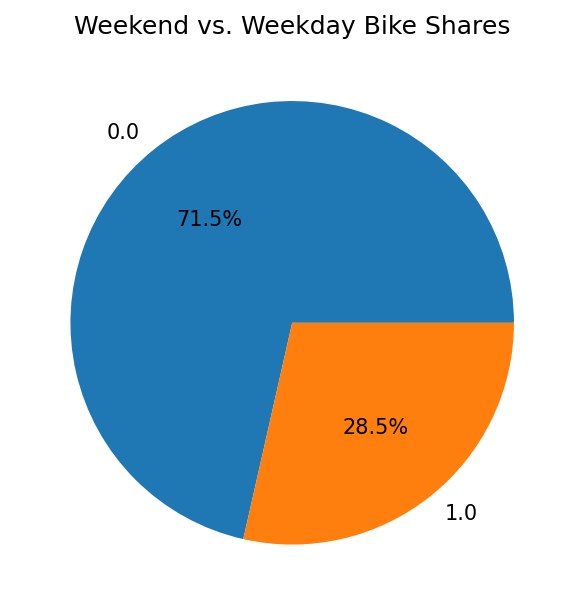

In [23]:
#Weekend and weekday
plt.figure(dpi=150)
bike.is_weekend.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title("Weekend vs. Weekday Bike Shares")
plt.show()

The two graph indicate that bike share tend to increase on a weekday and drop on the weekends.

Bike shares tends to increase during rush hour (7AM and 5PM). This indicates that people use bikes when going to work. 

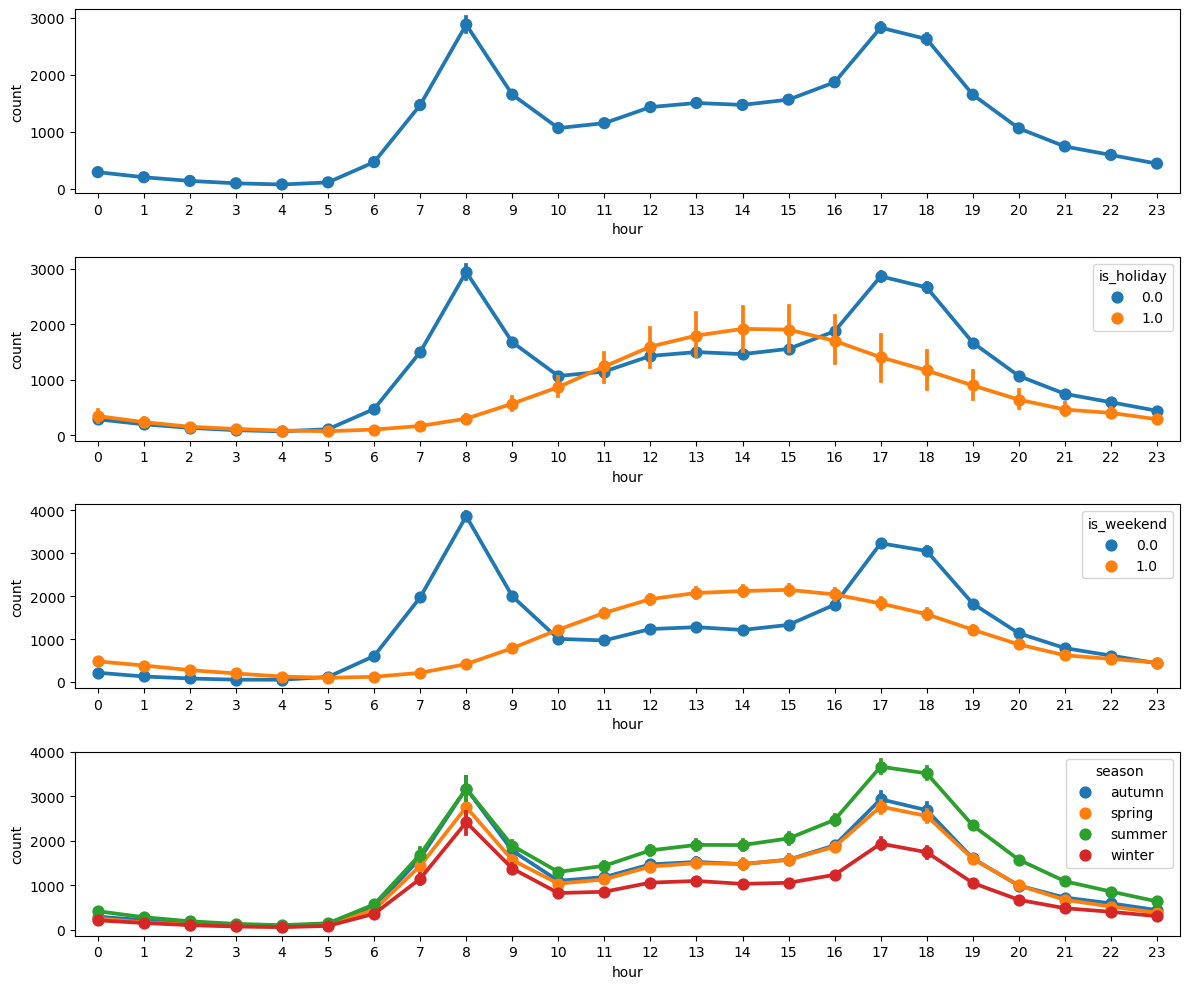

In [25]:
#Set of plots using hour
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=bike, x="hour", y="count", ax=axs[0])
sns.pointplot(data=bike, x="hour", y="count", ax=axs[1], hue="is_holiday")
sns.pointplot(data=bike, x="hour", y="count", ax=axs[2], hue="is_weekend")
sns.pointplot(data=bike, x="hour", y="count", ax=axs[3], hue="season")
plt.tight_layout()

These plots provides a detailed breakdown of the average number of bike shares for each hour, categorized by holiday status, weekend status, and season. Here's an overview of the key insights from the data:

Holiday and Weekend Trends:
Holidays: On holidays, there is a general decrease in bike shares compared to non-holidays.

Weekends: Bike shares are higher on weekends compared to weekdays, especially during daytime hours.

Seasonal Patterns:
Spring and Summer: These seasons generally have higher average bike shares across all hours of the day compared to autumn and winter.
Autumn and Winter: Bike shares are typically lower during these seasons, with some fluctuations.

Hourly Trends:
Morning Peak: There is a notable increase in bike shares during the early morning hours (around 7-9 AM), suggesting higher usage for commuting.

Evening Peak: Another peak in bike shares occurs in the late afternoon and early evening hours (around 4-7 PM), which aligns with the evening commute.

Night-time Lows: Bike shares are at their lowest during the late night and early morning hours (around 1-5 AM).

Interaction Effects:
Weekend and Season Interaction: Weekends in spring and summer show the highest average bike shares, while weekends in autumn and winter have lower averages.

Hourly Variation by Season: The hourly trends vary by season, with spring and summer generally exhibiting higher peaks during daytime hours compared to autumn and winter.

These insights can help in understanding the overall patterns of bike share usage, which can be valuable for resource allocation, marketing strategies, and operational planning for bike share services.

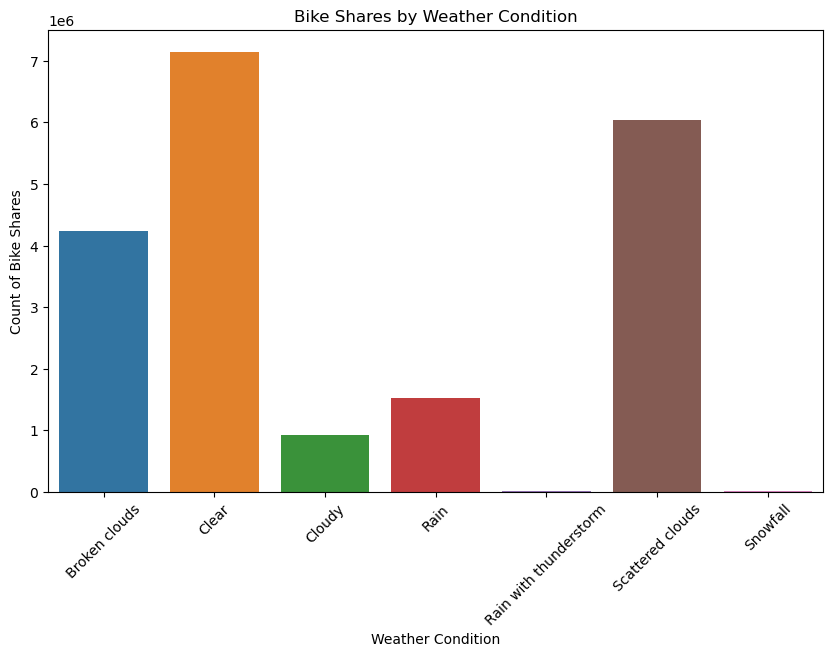

In [26]:
#Bike Shares by Weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=bike, estimator=sum, ci=None)
plt.title('Bike Shares by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation=45)
plt.show()

The bar plot represents the total bike shares by different weather conditions. Here's a breakdown:

Clear + Few clouds: This weather condition has the highest total bike shares, indicating that people are more likely to rent bikes when the weather is clear with few clouds.

Mist + Cloudy: This category has a lower total bike share compared to Clear + Few clouds, suggesting that less favorable weather conditions might slightly reduce bike rentals.

Light Snow, Light Rain: This weather condition has a lower total bike share, indicating that people are less inclined to rent bikes when there is light snow or rain.

Heavy Rain + Thunderstorm: This category has the lowest total bike share, indicating that very unfavorable weather conditions significantly reduce bike rentals.

Overall, the data suggests that weather conditions play a role in bike rental patterns, with clear and few clouds being the most favorable for bike rentals, while heavy rain and thunderstorms reduce bike rentals the most.

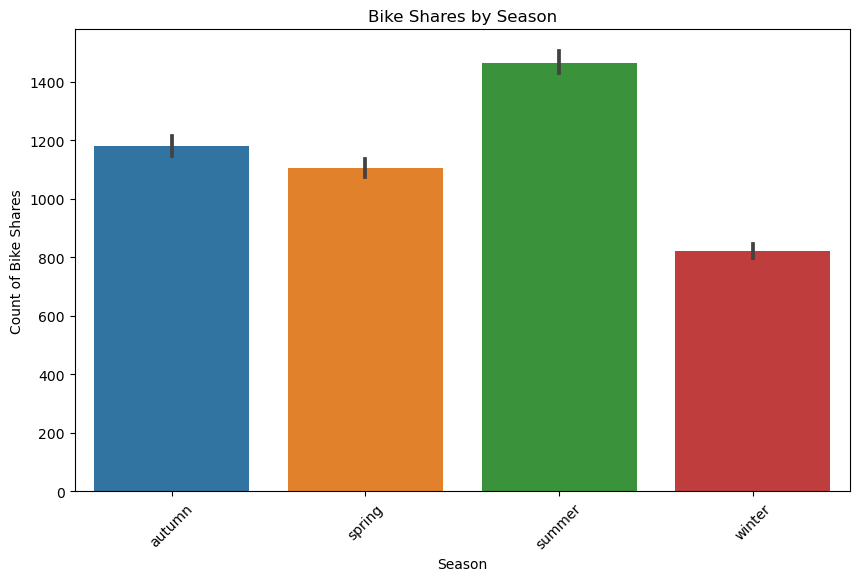

In [27]:
#Bike Shares by Season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=bike)
plt.title('Bike Shares by Season')
plt.xlabel('Season')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation = 45)
plt.show()

Bike share increases during summer and decreases during winter.

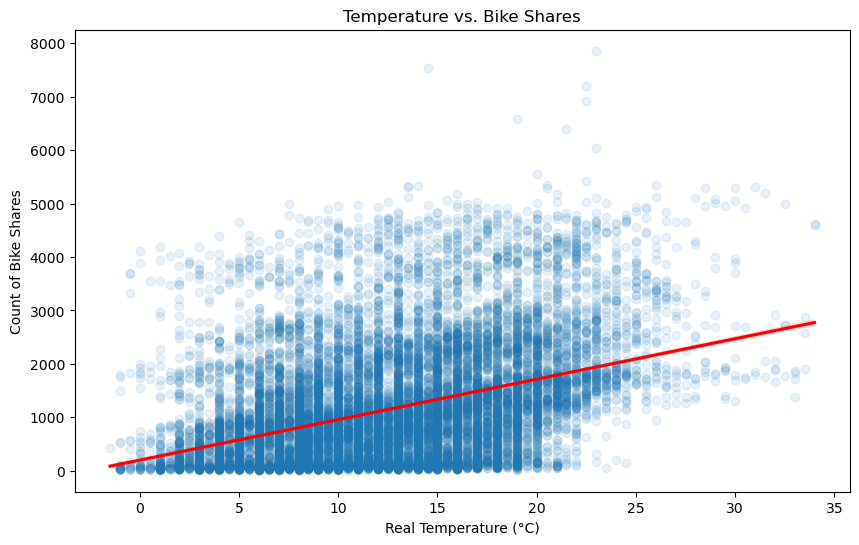

In [28]:
#Temperature vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp_real_C', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Temperature vs. Bike Shares')
plt.xlabel('Real Temperature (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases as the temperature increases and it becomes more comfortable riding a bike.

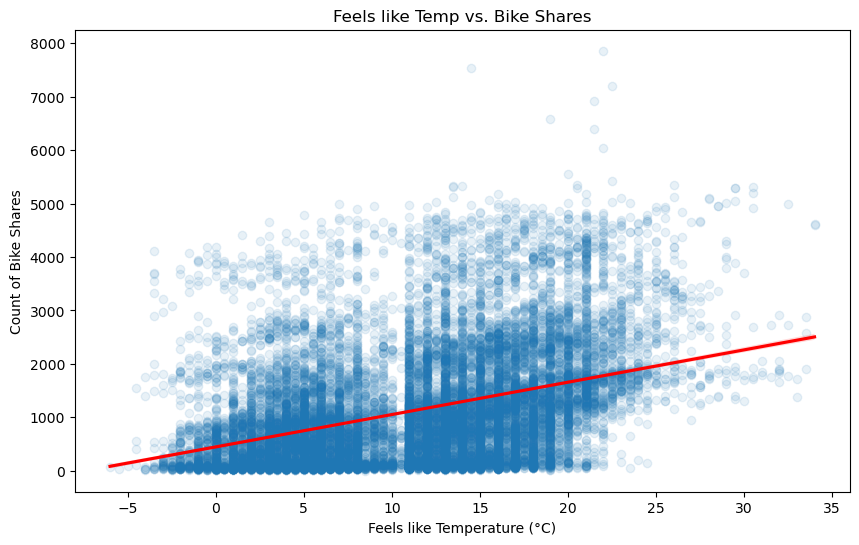

In [29]:
#Feels like Temp vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp_feels_like_C', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Feels like Temp vs. Bike Shares')
plt.xlabel('Feels like Temperature (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases as the temperature increases and it becomes more comfortable riding a bike.

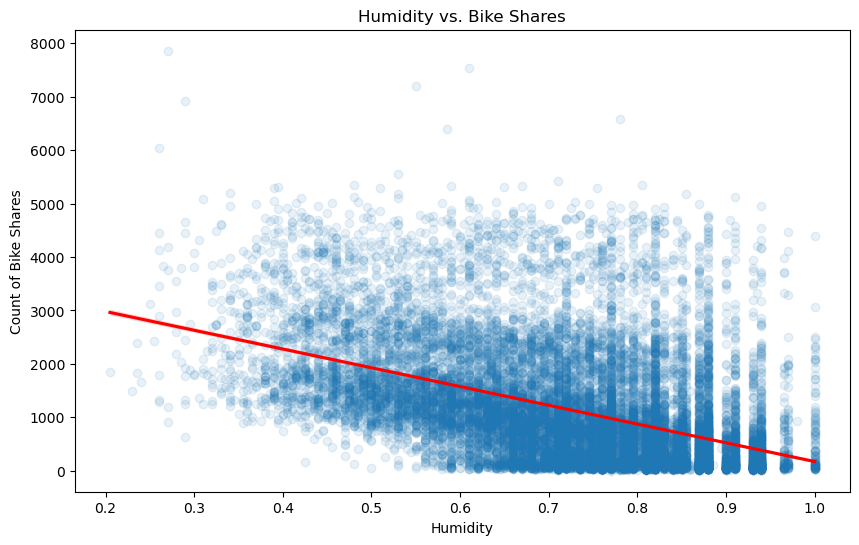

In [30]:
#Humidity vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'humidity_percent', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Humidity vs. Bike Shares')
plt.xlabel('Humidity')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share decreases as the humidity increases and it becomes more uncomfortable riding a bike.

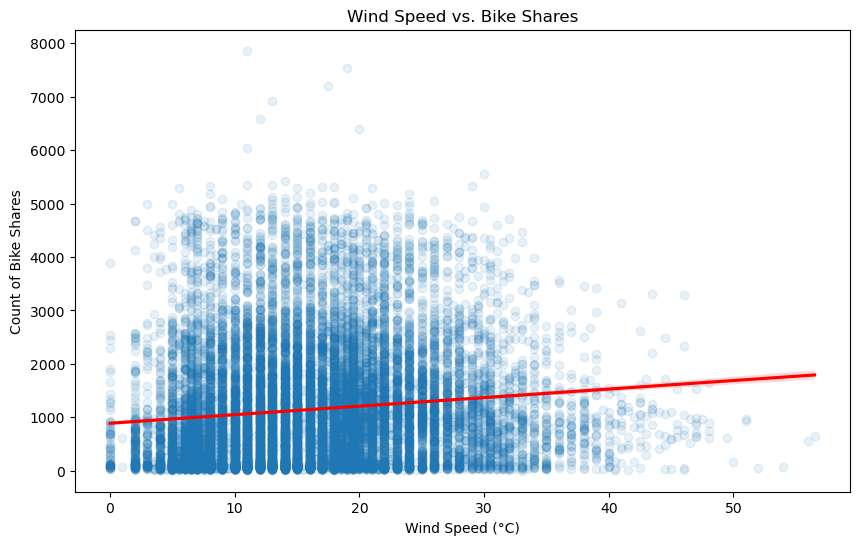

In [31]:
#Plot of Wind Speed vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'wind_speed_kph', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Wind Speed vs. Bike Shares')
plt.xlabel('Wind Speed (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases a little as the windspeed increases.

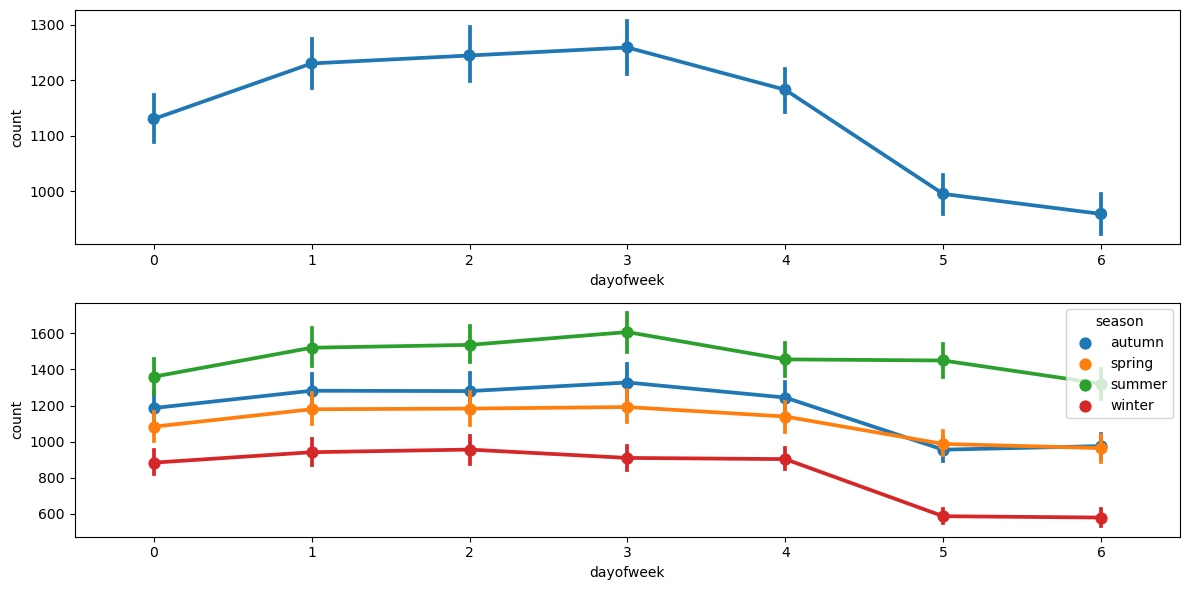

In [32]:
#Set of plots using season
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,6), dpi=100)
sns.pointplot(data=bike, x="dayofweek", y="count", ax=axs[0])
sns.pointplot(data=bike, x="dayofweek", y="count", ax=axs[1], hue="season")
plt.tight_layout()

The graph follows the same pattern in each season. That indicated that the bike share increases throughout the week and dropping on the weekends the only difference the the difference in count between season. As people use less bikes in the colder months.

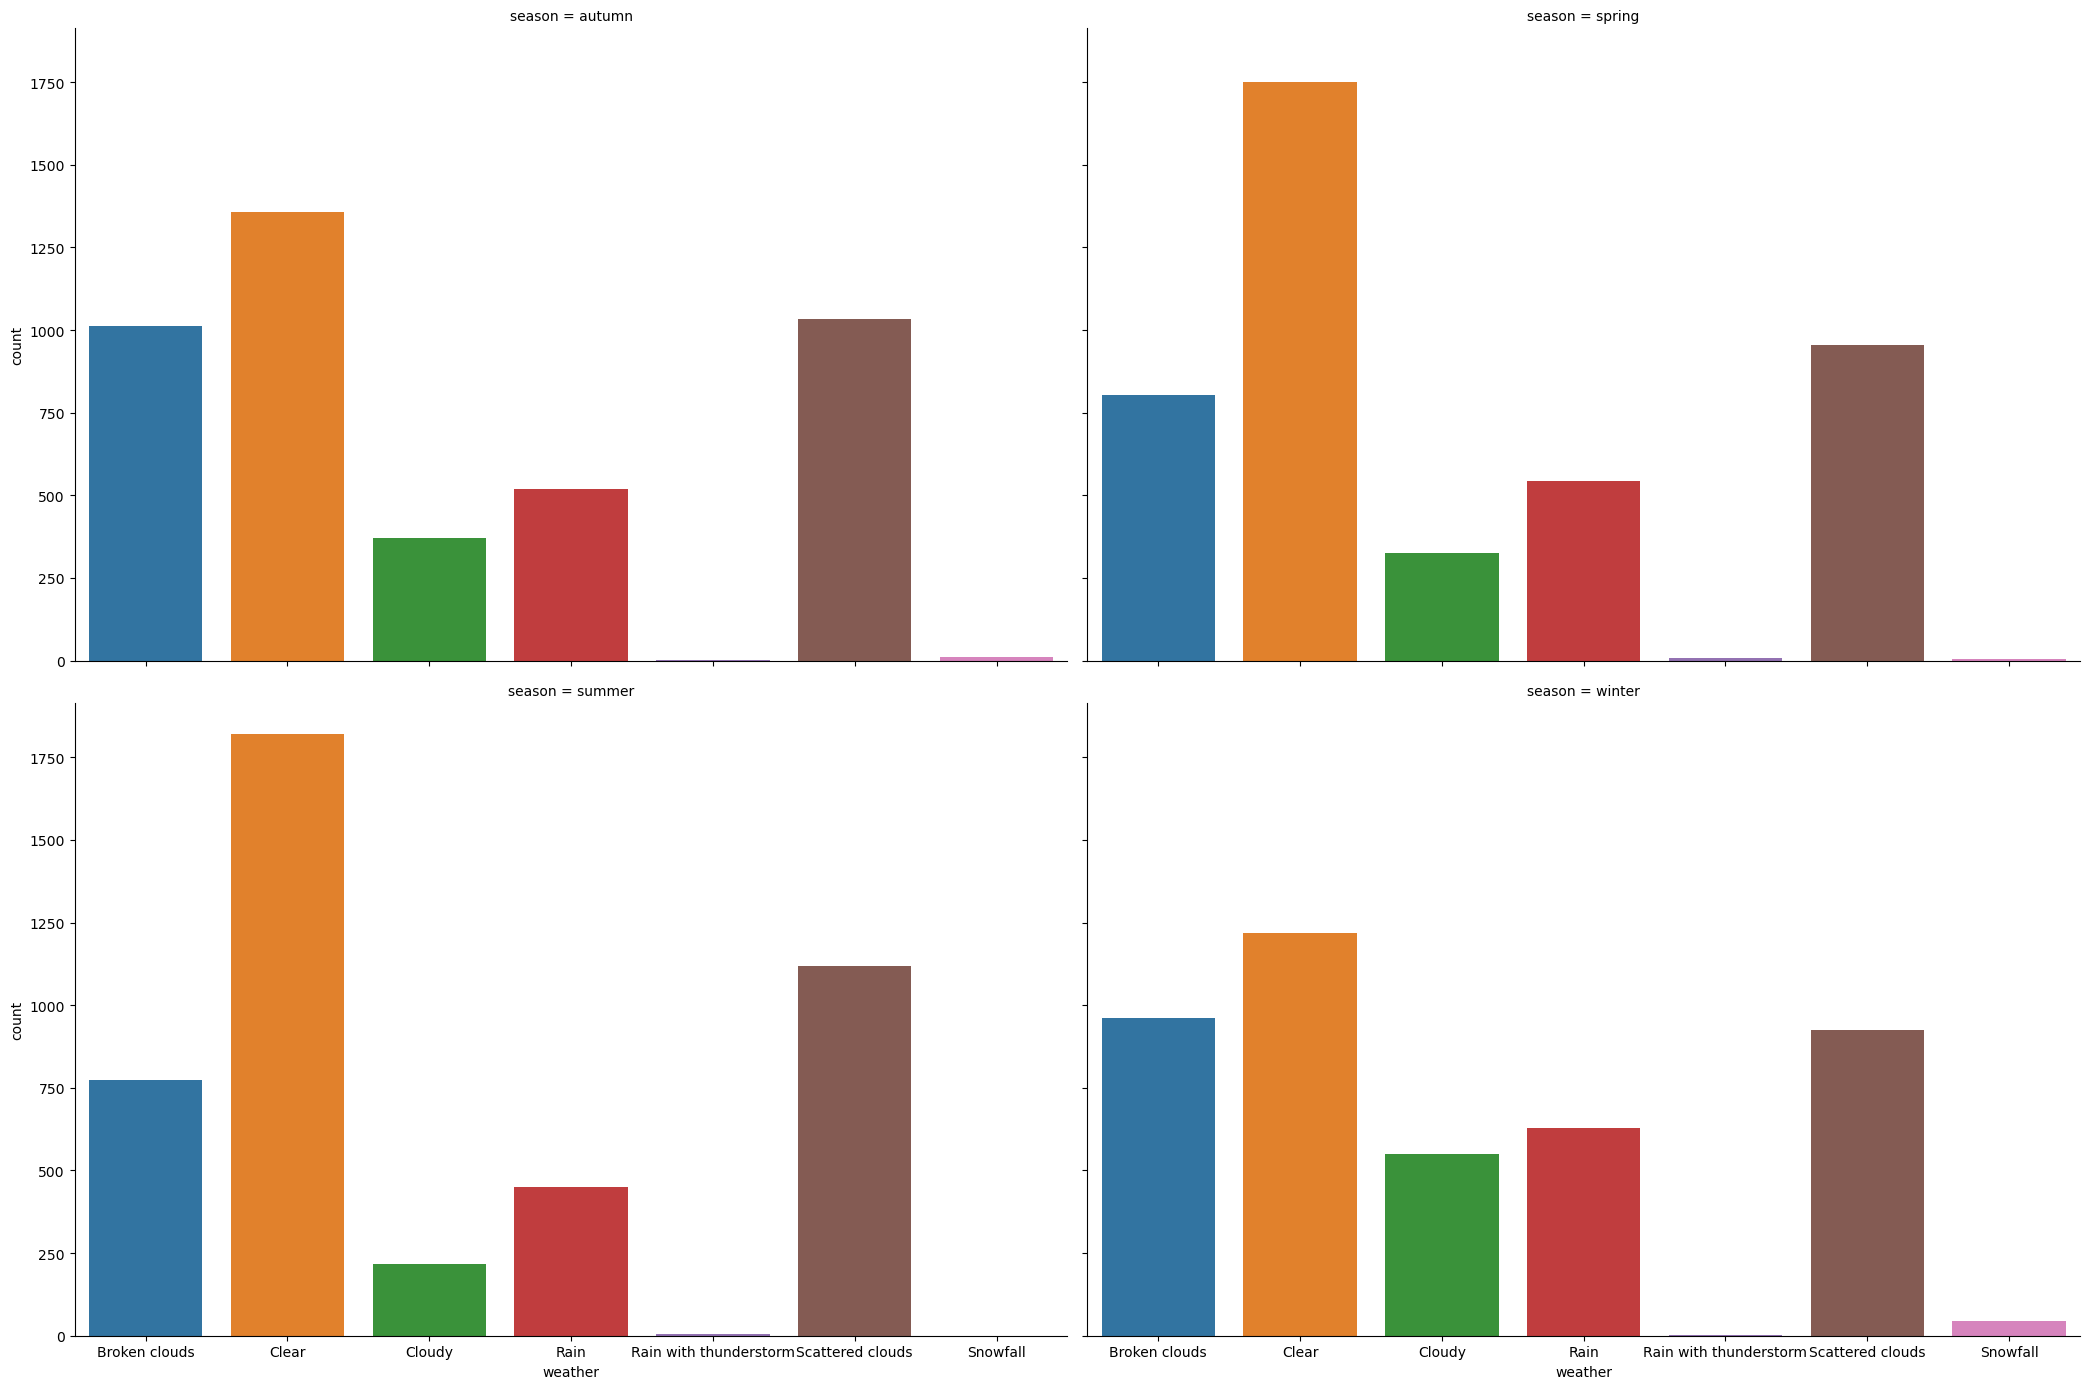

In [33]:
#No of bike Shares by season and weather condition 
sns.catplot(data=bike, x="weather", col="season", kind="count", height=7, aspect=1.5, col_wrap=2)

As expected the count is decreasing in cold and wet weather and increasing in sunny weather.

Bike Share Analysis Report

Introduction:
In this report, we analyze the factors influencing bike share based on a dataset containing information such as temperature, weather conditions, day of the week, and hour of the day. The goal is to understand how these factors affect bike share counts.

Key Findings:

Temperature:
Correlation: There is a strong positive correlation (0.99) between temp_real_C and temp_feels_like_C, indicating that these variables are highly positively correlated, which is expected since they both relate to temperature.
Impact: Higher temperatures are associated with more bike shares, as shown by the moderate positive correlation (0.389) between temp_real_C and count.
Humidity:
Correlation: There is a moderate negative correlation (-0.463) between humidity_percent and count, indicating that higher humidity is associated with fewer bike shares.
Impact: Bike shares decrease as humidity increases, suggesting that comfort levels influence shares decisions.
Day of the Week and Month:
Correlation: There is a weak positive correlation (0.063757) between month and count, suggesting a slight tendency for bike shares to increase with higher month numbers.
There is a weak negative correlation (-0.068688) between dayofweek and count, indicating a slight tendency for bike shares to decrease on later days of the week.
Hourly Usage:
Correlation: There is a weak positive correlation (0.32) between hour and count, indicating that certain hours of the day are associated with higher bike shares counts. 
Usage Patterns: Bike shares peak during rush hours on weekdays, suggesting that people use bikes for commuting.
Weather Conditions:
Weather Impact: Bike shares are higher on clear days, followed by broken clouds or scattered cloudy days. Good weather is associated with increased bike rentals.
Seasonal Trends:
Seasonal Impact: Bike shares increase during summer and decrease during winter, indicating a seasonal pattern in bike usage.
Conclusion:
Overall, this analysis highlights the impact of various factors on bike shares. Temperature, humidity, day of the week, and hour of the day all play a role in determining bike shares counts. 

## Recommendations

Weather-based Promotions: Implement targeted promotional campaigns during periods of favorable weather conditions, such as clear days or mild temperatures. These promotions can include discounts, special offers, or incentives to encourage more people to use bike share services when the weather is conducive to outdoor activities. By leveraging weather data, bike share operators can effectively plan these promotions to maximize their impact.

Hourly Pricing: Consider implementing flexible pricing strategies based on peak hours of bike share usage. Higher prices during peak hours, such as rush hours on weekdays, can help redistribute demand to off-peak hours. Lower pricing during off-peak hours can incentivize more people to use bike share services when demand is typically lower. This approach can help optimize bike availability and reduce congestion during peak times.

Seasonal Planning: Adjust bike availability and marketing efforts based on seasonal trends in bike share usage. For example, during the summer months when bike share usage is typically higher, increase the number of bikes available and promote the service more aggressively. During the winter months, when usage is lower, consider reducing the number of bikes available and focusing marketing efforts on indoor or weather-resistant activities. This approach can help ensure that bike share programs are meeting the seasonal demands of their users.

By implementing these recommendations, bike share operators can better align their services with the needs and preferences of their users, ultimately leading to increased ridership and more sustainable transportation options for urban areas.

## Conclusion

In conclusion, this analysis has provided valuable insights into the factors influencing bike share usage, highlighting the importance of weather conditions, time of day, and seasonal trends. The findings indicate that temperature, humidity, and weather conditions play significant roles in determining bike share counts, with higher temperatures and favorable weather associated with increased ridership. Additionally, hourly usage patterns reveal that bike shares peak during rush hours on weekdays, suggesting a strong relationship between bike share usage and commuting behavior.

The recommendations outlined in this report, including weather-based promotions, hourly pricing adjustments, and seasonal planning, offer practical strategies for bike share operators to optimize their services and enhance ridership. By implementing these recommendations, bike share programs can better meet the needs of their users and contribute to more sustainable transportation options in urban areas.

Overall, this analysis demonstrates the potential for data-driven insights to inform decision- making in bike share programs, helping to improve service efficiency, promote ridership, and contribute to a more sustainable urban transportation ecosystem.
